In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

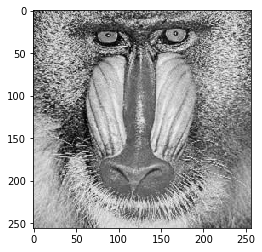

In [38]:
# Show the original image
img = cv2.imread('Mandrill.png',0)
plt.imshow(img, cmap='gray')

In [39]:
# blur function returns the blurred image given a clear image and the kernel size to be used for blurring
def blur(img, kernel):
    assert kernel.shape[0] == kernel.shape[1]
    kernel = np.flip(kernel, (0,1)) # Flipping the kernel through both axes 
    n = kernel.shape[0]
    (l,w) = img.shape
    assert n%2==1
    blur_img = np.zeros(img.shape)
    
    # For each i,j we superpose the flipped kernel on top of the image coordinate and multiply corresponding values
    # and add them. We also normalise each value by the kernel_sum since the sum of the kernel is assumed to be 1.
    # For the boundary values where part of the kernel lies outside the image, we will normalise only with the values 
    # in the kernel which lie within the image.
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            kernel_sum = 0
            intensity_sum = 0
            # Compute the sum of all the intensities around a particular coordinate multiplied by the corresponding 
            # kernel values. This is stored in intensity_sum. kernel_sum stores the sum of all kernel values which 
            # lie within the image.
            for k in range(i-n//2,i+n//2+1):
                for m in range(j-n//2, j+n//2+1):
                    if k<l and k>=0 and m<w and m>=0:
                        kernel_sum+=kernel[k-(i-n//2), m-(j-n//2)]
                        intensity_sum +=kernel[k-(i-n//2), m-(j-n//2)]*img[k,m]
            
            # Finally the computed image intensity for that coordinate is normalised by the kernel_sum
            blur_img[i,j] = intensity_sum/kernel_sum
    # Return the blurred image
    return blur_img

# Function to compute the gaussian kernel given the value of sigma
def get_kernel(sigma):
    # n is the kernel size
    n = ceil(6*sigma + 1)
    # n=1 is a trivial case
    if n==1: return np.array([[1.]])
    # Make n odd
    if n%2==0:
        n+=1
    # Compute all the values of the gaussian kernel
    p = n//2
    kernel = np.zeros((n,n))
    for i in range(-p, p+1):
        for j in range(-p,p+1):
            kernel[p+i,p+j] = np.exp((-i**2-j**2)/(2*(sigma**2)))/(2*(sigma**2)*np.pi) ## Recheck this
    
    return kernel
     

In [40]:
# List of sigmas for which blurred image has to be computed
sigmas = [1.6, 1.2, 1.0, 0.6, 0.3, 0.0]
blurred_imgs = []
for sig in sigmas:
    # Get the Gaussian kernel
    ker = get_kernel(sig)

    # Compute the blurred image for each value of sigma
    blurred_img = blur(img, ker)
    blurred_imgs.append(blurred_img)


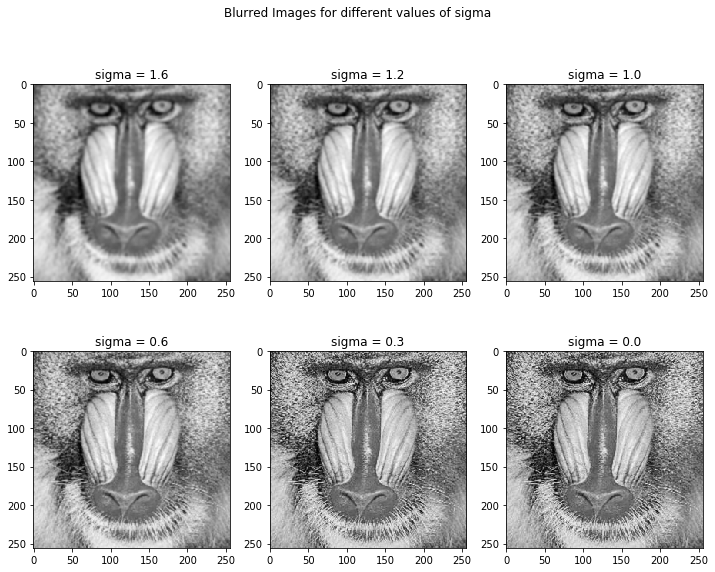

In [45]:
# Plot all the blurred images
f, axs = plt.subplots(2, 3, figsize = (12,9))
plt.suptitle("Blurred Images for different values of sigma")
for i in range(2):
    for j in range(3):
        axs[i,j].set_title("sigma = %.1f"%(sigmas[3*i+j]))
        axs[i,j].imshow(blurred_imgs[3*i+j], cmap = 'gray')
plt.show()

It is clearly seen that as the value of sigma increases(i.e. kernel size increases), the blurring applied on the original image increases.